# <center>Getting Started with the Data</center>
We'll be using Python 3 and will be primarily using libraries such as: pandas, numpy, matplotlib, scikit-learn, seaborn, and more.

In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
import json
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set()

The dataset we'll be using is the Trending Youtube Video Statistics, specifically we'll be looking at the dataset for trending videos in the United States.

The US dataset comes in the form of a CSV and the associated categories are stored in a JSON file.

# Preprocessing our Data

Before running any actual code, we had to change our US_category_id.json file so it would properly read into pandas. We've included the following json here:

# Reading the Data

In [14]:
category_df = pd.read_json("youtube-new/US_category_id.json")
category_df.head()

,etag,id,kind,snippet
0,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
1,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
2,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
3,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
4,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."


We have a total of 4 columns from our category data.
* etag - Some unique identifier for each specific category
* id - The idea for an associated category
* kind - The type of category
* snippet - An object that contains information such as the channel ID and title of a category.

In [15]:
yt_df = pd.read_csv("youtube-new/USvideos.csv")
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


The actual US trending videos dataset we have:
* video_id
* trending_date
* title
* channel_title
* category_id
* publish_time
* tags
* views
* likes
* dislikes
* comment_count
* thumbnail_link
* comments_disabled
* ratings_disabled
* video_error_or_removed
* description

# Tidying the Data

For starters, we're going to tidy up the category dataset and excise any extraneous data that we don't need. Specifically only want the ID of a category and the corresponding category and drop everything else.

In [16]:
for index, row in category_df.iterrows():
    category_df.at[index, 'category'] = row['snippet']['title'] #Extract 'title' from 'snippet' object
category_df = category_df.drop(['kind','etag','snippet'], axis=1) #Drop useless columns
categorydf = category_df.set_index(category_df.id)
categorydf.drop('id',axis=1)
categories = categorydf['category']
categories[:5]

id
1     Film & Animation
2     Autos & Vehicles
10               Music
15      Pets & Animals
17              Sports
Name: category, dtype: object

Next, we're going to tidy up the US Trending Youtube Video Dataset.

For the purposes of our analysis, we don't really care about the 'video_id','publish_time', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', or 'description'columns of our dataset, so we'll drop them.

We also want to convert the publish dates and trending dates of our dataset into datetime objects so they're easier to work with later.

We also want to convert the 'tags' column into an array with each of the tags so we don't have to deal with string manipulation later.

In [18]:
for index, row in yt_df.iterrows():
    yt_df.at[index, 'trending_date'] = datetime.strptime(row['trending_date'], '%y.%d.%m')
    yt_df.at[index, 'publish_datetime'] = datetime.strptime(row['publish_time'].split(".")[0], '%Y-%m-%dT%H:%M:%S')
    yt_df.at[index, 'tags'] = row['tags'].replace('"','').split("|")
    yt_df.at[index, 'category'] = categories[row['category_id']]
    if row['dislikes'] != 0:
        yt_df.at[index, 'like_ratio'] = int(row['likes']/row['dislikes'])
    else:
        yt_df.at[index, 'like_ratio'] = int(row['likes']) #Fix this??!??!?!
yt_df = yt_df.drop(['video_id','publish_time', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed','description'], axis=1)
yt_df = yt_df[['title','channel_title','category_id','category','publish_datetime','trending_date','tags','views','like_ratio','likes','dislikes','comment_count']]
yt_df.head()

,title,channel_title,category_id,category,publish_datetime,trending_date,tags,views,like_ratio,likes,dislikes,comment_count
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01,2017-11-14 00:00:00,[SHANtell martin],748374,19.0,57527,2966,15954
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13 07:30:00,2017-11-14 00:00:00,"[last week tonight trump presidency, last week...",2418783,15.0,97185,6146,12703
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,2017-11-14 00:00:00,"[racist superman, rudy, mancuso, king, bach, r...",3191434,27.0,146033,5339,8181
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13 11:00:04,2017-11-14 00:00:00,"[rhett and link, gmm, good mythical morning, r...",343168,15.0,10172,666,2146
4,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,2017-11-14 00:00:00,"[ryan, higa, higatv, nigahiga, i dare you, idy...",2095731,66.0,132235,1989,17518


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


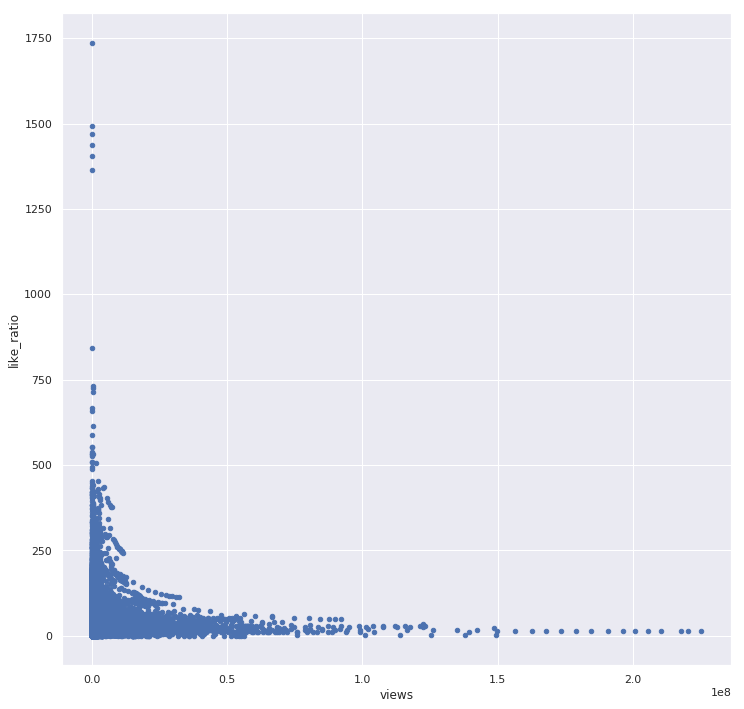

In [23]:
yt_df.plot.scatter('views','like_ratio', figsize=(12,12))

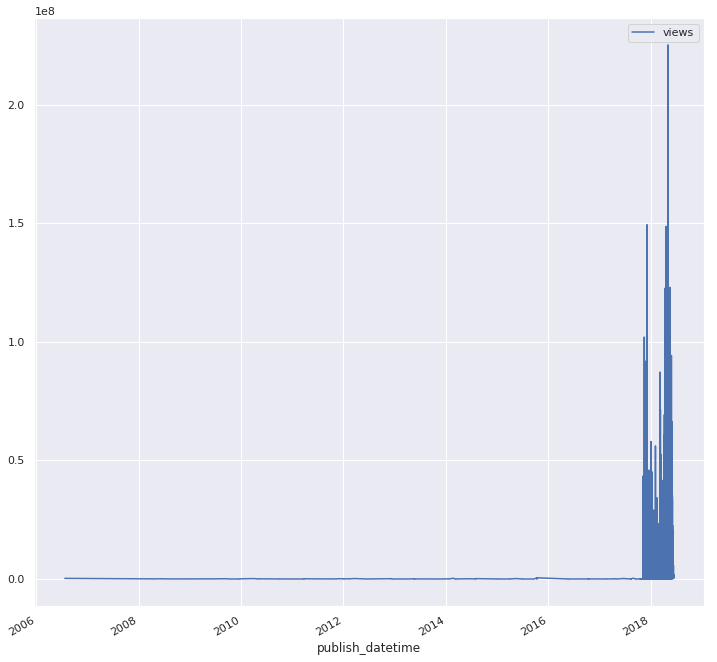

In [22]:
yt_df.plot('publish_datetime','views', figsize=(12,12))